# 🐧 Logistic Regression with the Penguins Dataset

Welcome to today's lab session! 🎉

In this notebook, we will:
- Perform **Exploratory Data Analysis (EDA)** on the `penguins` dataset 🏝️
- Train a **Logistic Regression Model** to predict penguin sex 🐧

Let's get started! 🚀

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
penguins = sns.load_dataset('penguins')
penguins.head()  # Display first few rows

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Check for missing values
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# Drop rows with missing values
penguins = penguins.dropna()
penguins.isnull().sum()  # Verify missing values are gone

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

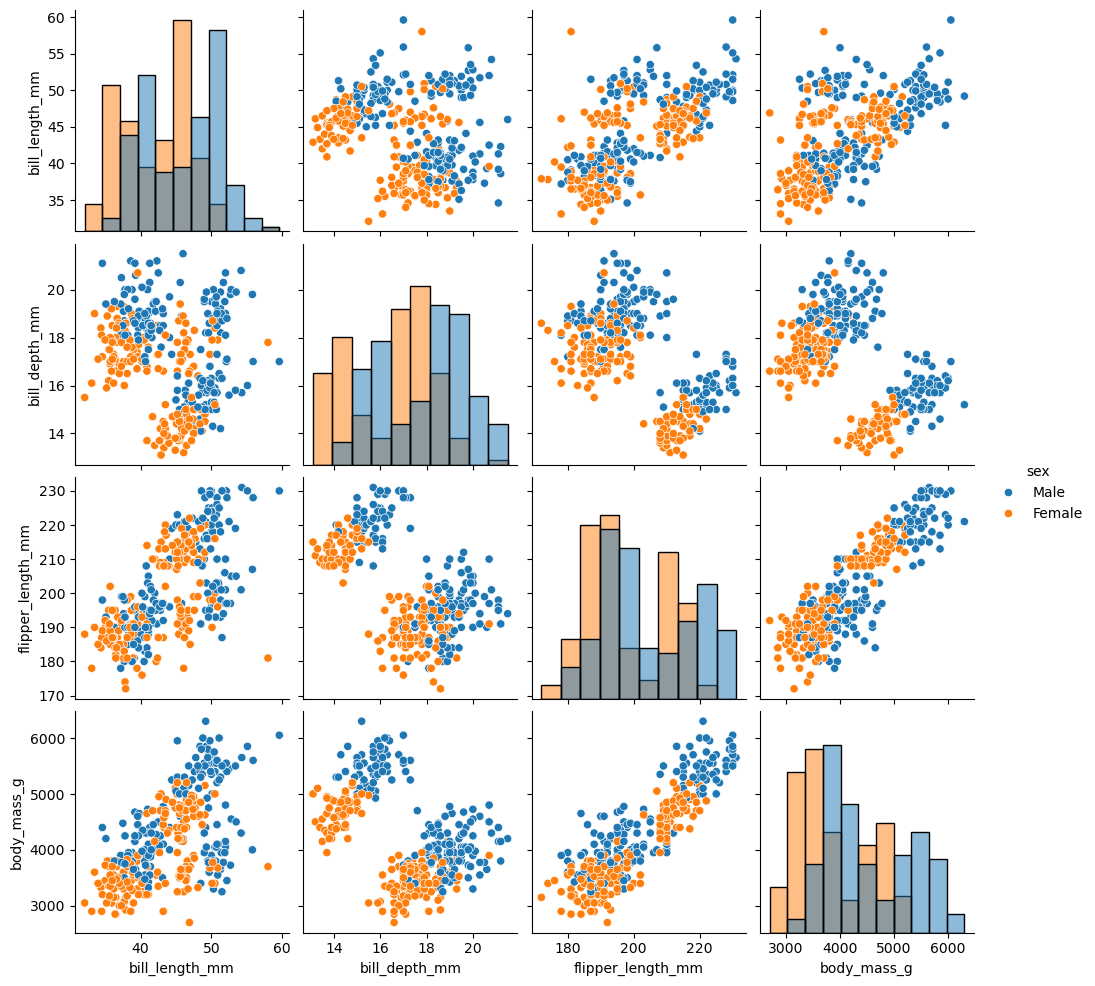

In [5]:
# Exploratory Data Analysis (EDA)
sns.pairplot(penguins, hue='sex', diag_kind='hist')
plt.show()

1️⃣ Modify and Expand EDA (15 min)
Task: Add at least two more visualizations to explore relationships.

Examples:

Does body mass vary significantly between species? (Hint: Use sns.boxplot) 📊

Do male and female penguins have different bill lengths? (Hint: Try sns.violinplot)

Goal: Think critically about which features might be useful for prediction! 🧠

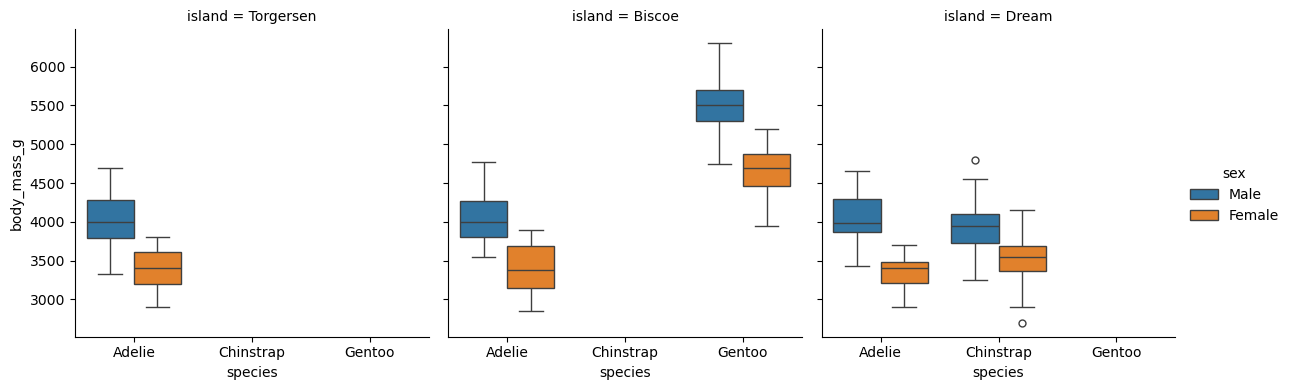

In [6]:
# Body Mass by Species, Sex, and Island
sns.catplot(data=penguins, x="species", y="body_mass_g", hue="sex", col="island",
            kind="box", height=4, aspect=1)
plt.show()

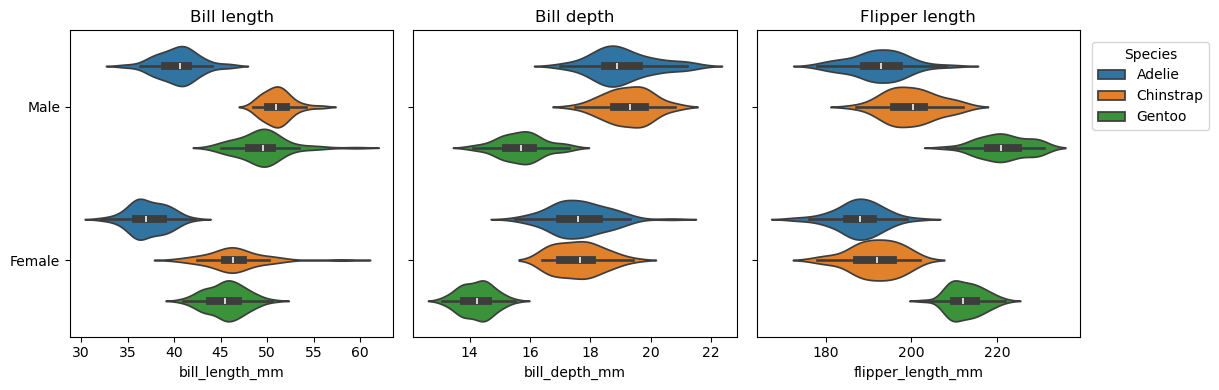

In [7]:
# Variability in pinguins' Bill Length and Depth as well as Flipper Length by Sex and Species

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 4))

sns.violinplot(data=penguins, x='bill_length_mm', y='sex', hue='species', legend=False, ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Bill length')

sns.violinplot(data=penguins, x='bill_depth_mm', y='sex', hue='species', legend=False, ax=ax2)
ax2.set_ylabel('')
ax2.set_yticklabels([])
ax2.set_title('Bill depth')

sns.violinplot(data=penguins, x='flipper_length_mm', y='sex', hue='species', ax=ax3)
ax3.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_title('Flipper length')

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, title='Species', loc='upper right', bbox_to_anchor=(1.11, 0.9))

ax3.legend_.remove()

plt.tight_layout()
plt.show()

In [8]:
# Encode categorical variables
le = LabelEncoder()
penguins['sex'] = le.fit_transform(penguins['sex'])  # Male=1, Female=0
penguins = pd.get_dummies(penguins, columns=['species', 'island'], drop_first=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,False,False,False,True
1,39.5,17.4,186.0,3800.0,0,False,False,False,True
2,40.3,18.0,195.0,3250.0,0,False,False,False,True
4,36.7,19.3,193.0,3450.0,0,False,False,False,True
5,39.3,20.6,190.0,3650.0,1,False,False,False,True


In [9]:
# Split data into training and testing sets
X = penguins.drop(columns=['sex'])  # Features
y = penguins['sex']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [11]:
# Model evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9104477611940298
Confusion Matrix:
 [[33  4]
 [ 2 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.88      0.93      0.90        30

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



 2️⃣ Feature Selection & Engineering (20 min)
Task: Try training the logistic regression model with different feature sets:

What happens if we remove body mass?

Does including island or species improve accuracy?

Goal: Understand how feature choices impact model performance! 🚀

In [12]:
# Excluding 'body_mass_g' feature from the model

X = penguins.drop(columns=['body_mass_g'])
y = penguins['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[37  0]
 [ 0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        30

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
# Removing additionally the islands feature from the model

X = penguins.drop(columns=['island_Dream', 'island_Torgersen'])
y = penguins['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
Confusion Matrix:
 [[36  1]
 [ 0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.98        30

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [ ]:
# Removing the species feature from the model

X = penguins.drop(columns=['species_Chinstrap', 'species_Gentoo'])
y = penguins['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
Confusion Matrix:
 [[36  1]
 [ 0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.98        30

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



3️⃣ Model Interpretation & Error Analysis (15 min)
Task: After training your model, interpret the results:

Which features had the most impact? 📊

Where did the model make the most mistakes? (Check confusion matrix) 🧐

Are male or female penguins harder to classify? Why? 🤔

Goal: Move beyond accuracy and think about real-world implications.

### SUMMARY with {y = 'sex'}
The least accurate model was the one with the maximum number of features. \
4 false guesses were made for female penguins and 2 for males.

The removal of penguin weight feature improved the model accuracy up to 1.0. \
This looks kind of strange because there is a very clear sex related difference in penguins' weight.

Do we have here an overfitting problem?..

A possible cause for that could be a clearly strong correlation between penguins' weight and body size measures. \
It can introduce redundancy due to its overlap with other features in that bringing multicollinearity to the model.
Which makes the model less stable and harder to fit.

Further removing the 'island' and 'species' features from the model had minimal impact on its accuracy, bringing about only 1 false female pick.

However it would be an overexageration to state that it's harder to guess females than males as the model already fits too well.

<Axes: >

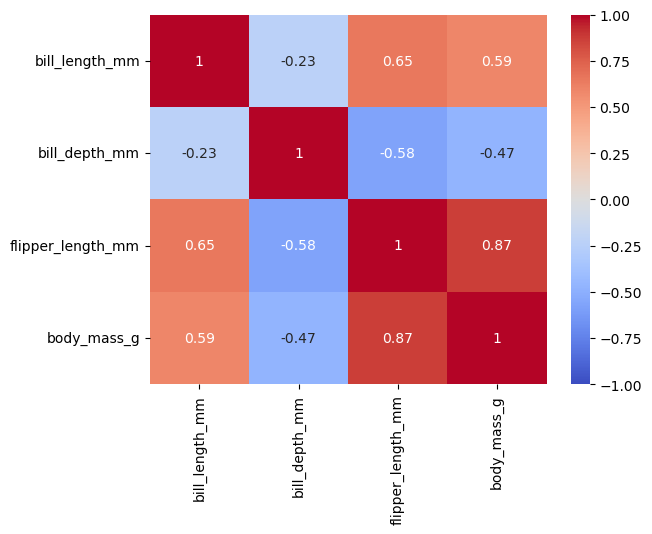

In [18]:
# Checking correlations between numerical columns of the penguins dataset.
# The strongest correlation is indeed between penguins body mass and flipper length.
# This could be one reason why this feature deteriorates the quality of the model.

penguins_only_num = penguins.select_dtypes(include=['float64'])
corr_matrix = penguins_only_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

🔹 4️⃣ Challenge: Make a Small Change (Optional, 20 min)
Task: Modify the logistic regression model and justify the change:

Adjust solver or C parameter and observe the effect. 🛠️
(take time to google this to understand further)
Change the target variable (e.g., predict species instead of sex).

Goal: Get comfortable experimenting and defending your choices! 💡

### Experimenting with solvers and C parameter of Logistic Regression model

In [19]:
# Repeating the first part of the ML pipeline for the whole dataset

penguins2 = sns.load_dataset('penguins')
penguins2 = penguins2.dropna()

le = LabelEncoder()
penguins2['sex'] = le.fit_transform(penguins2['sex'])  # Male=1, Female=0
penguins2 = pd.get_dummies(penguins2, columns=['species', 'island'], drop_first=True)

X = penguins2.drop(columns=['sex'])  # Features
y = penguins2['sex']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Comparing the model accuracy for different solvers and different values of C parameter

for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag']:
    for c in [0.01, 0.1, 1.0, 10.0, 100.0]:
        model = LogisticRegression(random_state=42, max_iter=10000, solver=solver, C=c)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        print(f"Solver={solver}, C={c} ---> Accuracy={round(score, 5)}")

Solver=lbfgs, C=0.01 ---> Accuracy=0.89552
Solver=lbfgs, C=0.1 ---> Accuracy=0.91045
Solver=lbfgs, C=1.0 ---> Accuracy=0.91045
Solver=lbfgs, C=10.0 ---> Accuracy=0.91045
Solver=lbfgs, C=100.0 ---> Accuracy=0.92537
Solver=liblinear, C=0.01 ---> Accuracy=0.86567
Solver=liblinear, C=0.1 ---> Accuracy=0.8806
Solver=liblinear, C=1.0 ---> Accuracy=0.86567
Solver=liblinear, C=10.0 ---> Accuracy=0.86567
Solver=liblinear, C=100.0 ---> Accuracy=0.89552
Solver=newton-cg, C=0.01 ---> Accuracy=0.89552
Solver=newton-cg, C=0.1 ---> Accuracy=0.91045
Solver=newton-cg, C=1.0 ---> Accuracy=0.91045
Solver=newton-cg, C=10.0 ---> Accuracy=0.91045
Solver=newton-cg, C=100.0 ---> Accuracy=0.92537
Solver=sag, C=0.01 ---> Accuracy=0.77612
Solver=sag, C=0.1 ---> Accuracy=0.80597
Solver=sag, C=1.0 ---> Accuracy=0.80597
Solver=sag, C=10.0 ---> Accuracy=0.80597
Solver=sag, C=100.0 ---> Accuracy=0.80597


### Changing the target variable to 'species'

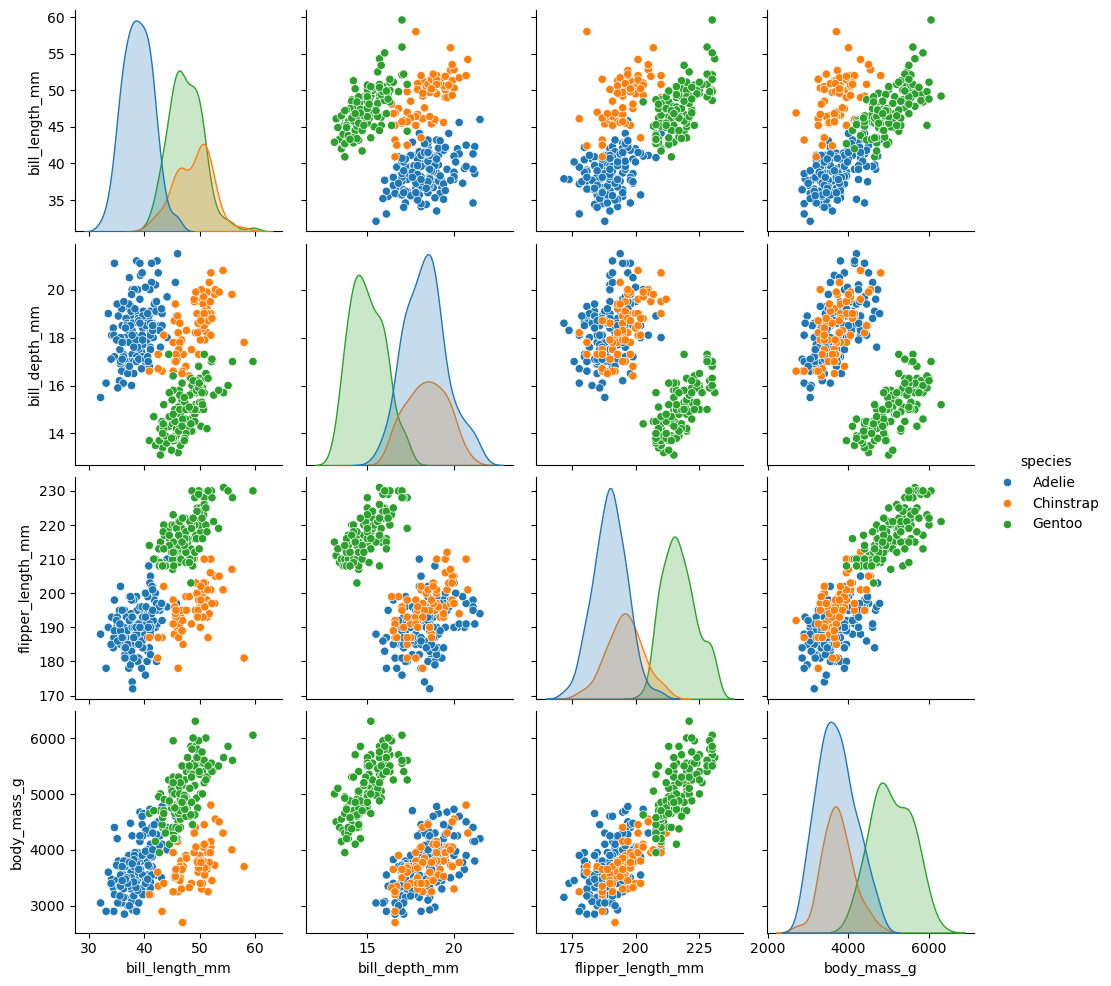

In [21]:
# Visualizing the relations between all numerical variables with differentiation by species

penguins3 = sns.load_dataset('penguins')

sns.pairplot(penguins3, hue='species')
plt.show()

In [ ]:
# Adjusting the model to the new requirements

penguins3 = penguins3.dropna()

le = LabelEncoder()
penguins3['sex'] = le.fit_transform(penguins3['sex'])  # Male=1, Female=0
penguins3 = pd.get_dummies(penguins3, columns=['island'], drop_first=True)

X = penguins3.drop(columns=['species'])  # Features
y = penguins3['species']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Testing the model with all features included

for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag']:
    for c in [0.01, 0.1, 1.0, 10.0, 100.0]:
        model = LogisticRegression(random_state=42, max_iter=10000, solver=solver, C=c)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        print(f"Solver={solver}, C={c} ---> Accuracy={round(score, 5)}")

Solver=lbfgs, C=0.01 ---> Accuracy=1.0
Solver=lbfgs, C=0.1 ---> Accuracy=1.0
Solver=lbfgs, C=1.0 ---> Accuracy=1.0
Solver=lbfgs, C=10.0 ---> Accuracy=1.0
Solver=lbfgs, C=100.0 ---> Accuracy=0.97015
Solver=liblinear, C=0.01 ---> Accuracy=0.98507
Solver=liblinear, C=0.1 ---> Accuracy=1.0
Solver=liblinear, C=1.0 ---> Accuracy=1.0
Solver=liblinear, C=10.0 ---> Accuracy=0.98507
Solver=liblinear, C=100.0 ---> Accuracy=0.98507
Solver=newton-cg, C=0.01 ---> Accuracy=1.0
Solver=newton-cg, C=0.1 ---> Accuracy=1.0
Solver=newton-cg, C=1.0 ---> Accuracy=1.0
Solver=newton-cg, C=10.0 ---> Accuracy=1.0
Solver=newton-cg, C=100.0 ---> Accuracy=0.97015
Solver=sag, C=0.01 ---> Accuracy=0.91045
Solver=sag, C=0.1 ---> Accuracy=0.92537
Solver=sag, C=1.0 ---> Accuracy=0.92537
Solver=sag, C=10.0 ---> Accuracy=0.92537
Solver=sag, C=100.0 ---> Accuracy=0.92537


In [24]:
# Testing the model without the body weight and island features

X = penguins3.drop(columns=['species', 'body_mass_g','island_Dream', 'island_Torgersen'])  # Features
y = penguins3['species']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag']:
    for c in [0.01, 0.1, 1.0, 10.0, 100.0]:
        model = LogisticRegression(random_state=42, max_iter=10000, solver=solver, C=c)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        print(f"Solver={solver}, C={c} ---> Accuracy={round(score, 5)}")

Solver=lbfgs, C=0.01 ---> Accuracy=0.98507
Solver=lbfgs, C=0.1 ---> Accuracy=1.0
Solver=lbfgs, C=1.0 ---> Accuracy=1.0
Solver=lbfgs, C=10.0 ---> Accuracy=1.0
Solver=lbfgs, C=100.0 ---> Accuracy=1.0
Solver=liblinear, C=0.01 ---> Accuracy=1.0
Solver=liblinear, C=0.1 ---> Accuracy=1.0
Solver=liblinear, C=1.0 ---> Accuracy=1.0
Solver=liblinear, C=10.0 ---> Accuracy=1.0
Solver=liblinear, C=100.0 ---> Accuracy=1.0
Solver=newton-cg, C=0.01 ---> Accuracy=0.98507
Solver=newton-cg, C=0.1 ---> Accuracy=1.0
Solver=newton-cg, C=1.0 ---> Accuracy=1.0
Solver=newton-cg, C=10.0 ---> Accuracy=1.0
Solver=newton-cg, C=100.0 ---> Accuracy=1.0
Solver=sag, C=0.01 ---> Accuracy=1.0
Solver=sag, C=0.1 ---> Accuracy=1.0
Solver=sag, C=1.0 ---> Accuracy=1.0
Solver=sag, C=10.0 ---> Accuracy=1.0
Solver=sag, C=100.0 ---> Accuracy=1.0


✅ Final Deliverables
At the end of class or as homework, submit to google classroom:

A completed notebook with your modifications. 📂

A short written reflection answering:

What patterns did you find in the data? 🔍

What feature(s) were most useful for prediction? 🧩

If you could collect one extra feature, what would it be and why? 🤯

# FINAL THOUGHTS
The results of predictive modeling for the given dataset emphasize the importance of selecting carefully the most appropriate features to avoid overcomplicating the model. The dataset must be first carefully cleaned and analyzed, in particular to prevent the effect of multicollinearity. For that purpose we should avoid introducing strongly correlated features into the model. In our case removing the penguins' body weight feature which correlated strongly with other body measurements apparently helped to improve the accuracy of the model.

Experimenting with different solvers and C parameters has shown that the default 'lbfgs' solver works perfectly fine for the 'penguins' dataset. The same can be said about 'newton-cg' solver. The least effective was 'sag' solver. On the other hand all of them can produce very good results if the model has features with already very distinctive associations with the model target.

Regarding the C parameter it seems a good idea to experiment with a wide range of those to chose the most appropriate combination with the used solver. It is not clear which one is the best before proper testing.

